In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_data = datasets.MNIST(
    root = 'pra',
    download = True,
    train = True,
    transform = transform
)
test_data = datasets.MNIST(
    root = 'pra',
    download = True,
    train = False,
    transform = transform
)

In [3]:
len(train_data)

60000

In [4]:
len(test_data)

10000

In [5]:
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=True)

data_itr = iter(train_loader)
images , values = next(data_itr)

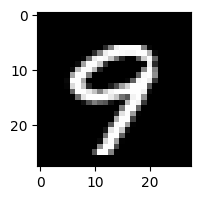

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()

In [7]:
values[0]

tensor(9)

In [8]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [9]:
model = DigitsClassifier()
optimizer = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [10]:
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images , values in train_loader:
        output = model(images)
        loss = criterion(output,values)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epochs [{epoch+1}/{epochs}],Loss : {running_loss/len(train_loader):.2f}")

Epochs [1/5],Loss : 0.38
Epochs [2/5],Loss : 0.19
Epochs [3/5],Loss : 0.14
Epochs [4/5],Loss : 0.11
Epochs [5/5],Loss : 0.10


In [11]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for images , values in test_loader:
        outputs = model(images)
        _ , pred = torch.max(outputs.data,1)
        correct += (pred == values).sum().item()
        total += values.size(0)
print(f"Accuracy on the test set : {100 * correct / total : .2f}")

Accuracy on the test set :  97.18


In [13]:
total , correct

(10000, 9718)

**Classification Report and Confusion Matrix**

In [19]:
model.eval()

all_values = []
all_predicts = []

with torch.no_grad():
    for images , values in test_loader:
        outputs = model(images)
        _,predict = torch.max(outputs.data,1)

        all_values.extend(values.numpy())
        all_predicts.extend(predict.numpy())

In [20]:
len(all_predicts)

10000

In [21]:
from sklearn.metrics import classification_report

report = classification_report(all_values,all_predicts)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_values,all_predicts)
cm

array([[ 972,    0,    0,    0,    0,    4,    1,    1,    2,    0],
       [   0, 1125,    1,    2,    0,    1,    2,    2,    2,    0],
       [   4,    2, 1006,    3,    5,    0,    3,    4,    5,    0],
       [   1,    0,    8,  980,    0,    2,    0,   11,    5,    3],
       [   1,    0,    4,    0,  942,    0,    4,    4,    1,   26],
       [   7,    0,    0,   13,    1,  856,    5,    1,    4,    5],
       [   6,    3,    1,    0,    4,    5,  935,    1,    3,    0],
       [   1,   10,   15,    4,    0,    0,    0,  991,    2,    5],
       [   6,    1,    3,    4,    2,    6,    4,    7,  938,    3],
       [   3,    5,    0,    5,    7,    3,    1,   11,    1,  973]])

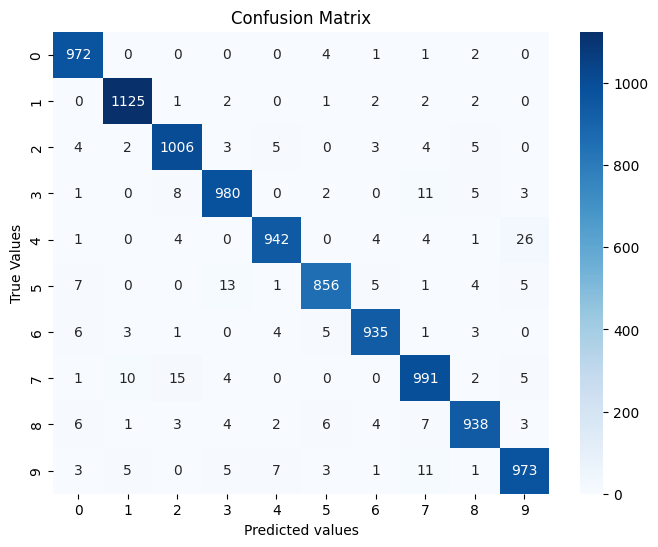

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=range(len(cm)),yticklabels=range(len(cm)))
plt.xlabel("Predicted values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show()